# First Project - Titanic Survival

My first project working on Kaggle using data from the Titanic to determine survival of passengers (https://www.kaggle.com/c/titanic).

## Table of Contents
***
* ### [1. Data Set](#dataset)
    * [1.1 Obtaining the data](#obtain)
    * [1.2 Reading the data](#reading)
    * [1.3 Visualize the data](#visualize)
* ### [2. Training](#training)
    * [2.1 Creating a test set](#testset)
    * [2.2 Visualize the data](#visualize2)
    * [2.3 Correlation](#corr)
* ### [3. Data Cleaning](#cleaning)
    * [3.1 Missing Features](#missing)
    * [3.2 Handling Text](#text)
    * [3.3 wut](#nah)
***

## <a id = "dataset">1. Data Set</a>

The data set here was obtained from Kaggle.com from https://www.kaggle.com/c/titanic/data.

In [85]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
import eli5
from eli5.sklearn import PermutationImportance
import shap

In [58]:
titanic = pd.read_csv('datasets/titanic/train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
for col in titanic.columns:
#     print(titanic[col].isnull().any())
    if titanic[col].isnull().any() == True:
        print(col + ' has {} empty values'.format(titanic[col].isnull().sum()))

Age has 177 empty values
Cabin has 687 empty values
Embarked has 2 empty values


In [109]:
y = titanic.Survived

base_features = ['Age','Fare','Pclass','SibSp','Parch']

X = titanic[base_features]

my_imputer = SimpleImputer()
iX = pd.DataFrame(my_imputer.fit_transform(X),columns=base_features)
iX.head(10)

,Age,Fare,Pclass,SibSp,Parch
0,22.000000,7.2500,3.0,1.0,0.0
1,38.000000,71.2833,1.0,1.0,0.0
2,26.000000,7.9250,3.0,0.0,0.0
3,35.000000,53.1000,1.0,1.0,0.0
4,35.000000,8.0500,3.0,0.0,0.0
5,29.699118,8.4583,3.0,0.0,0.0
6,54.000000,51.8625,1.0,0.0,0.0
7,2.000000,21.0750,3.0,3.0,1.0
8,27.000000,11.1333,3.0,0.0,2.0
9,14.000000,30.0708,2.0,1.0,0.0


In [110]:
train_X, val_X, train_y, val_y = train_test_split(iX, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)

In [ ]:
feat_name = 'pickup_longitude'
pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

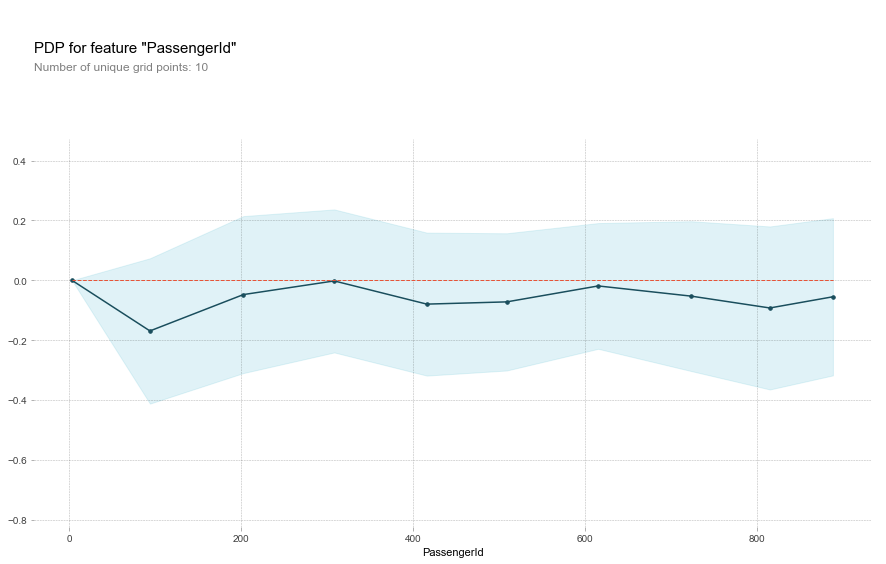

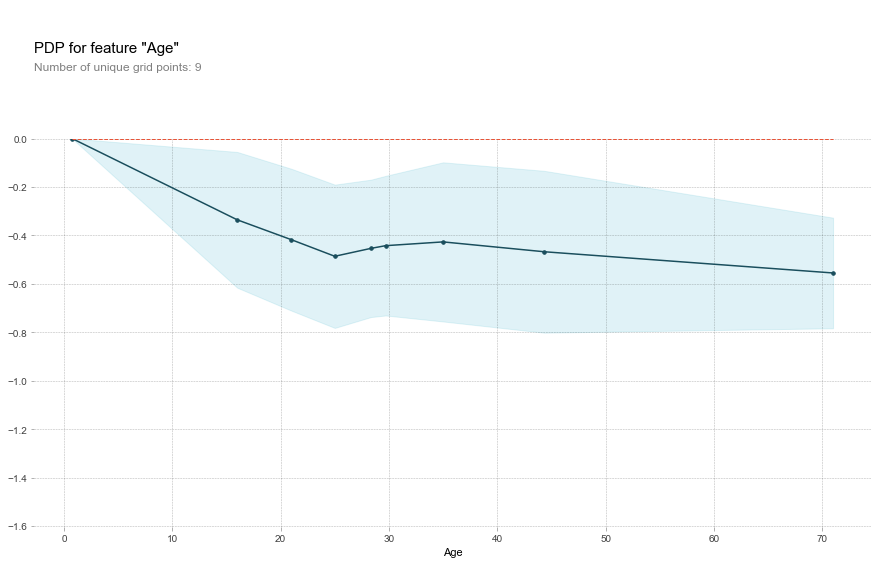

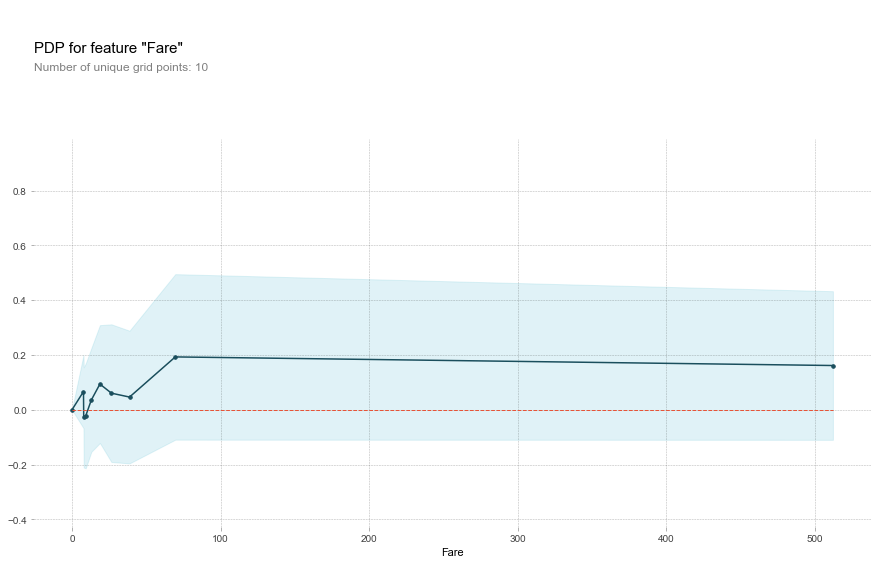

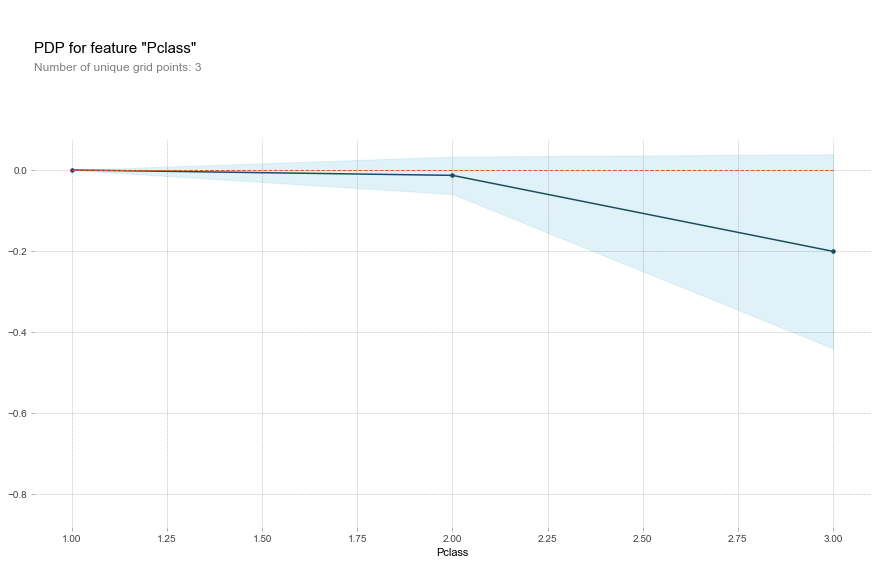

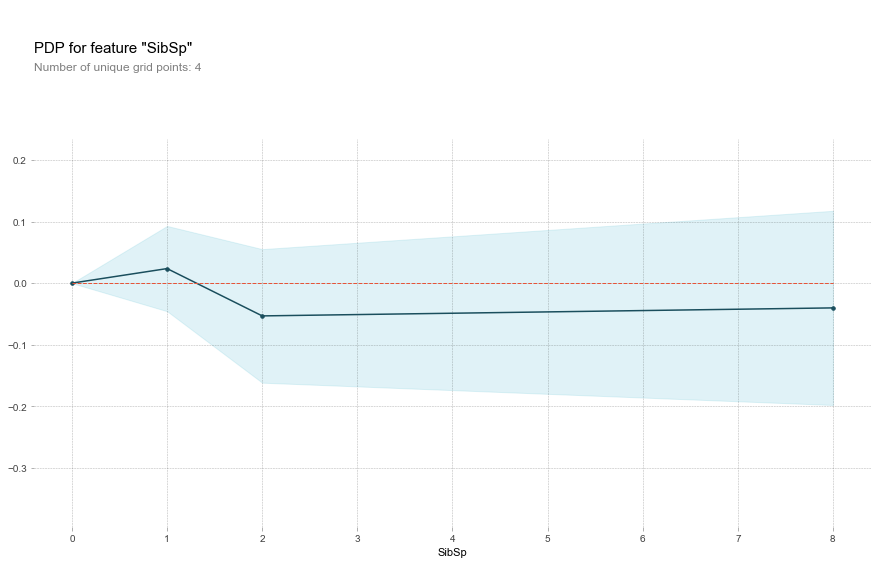

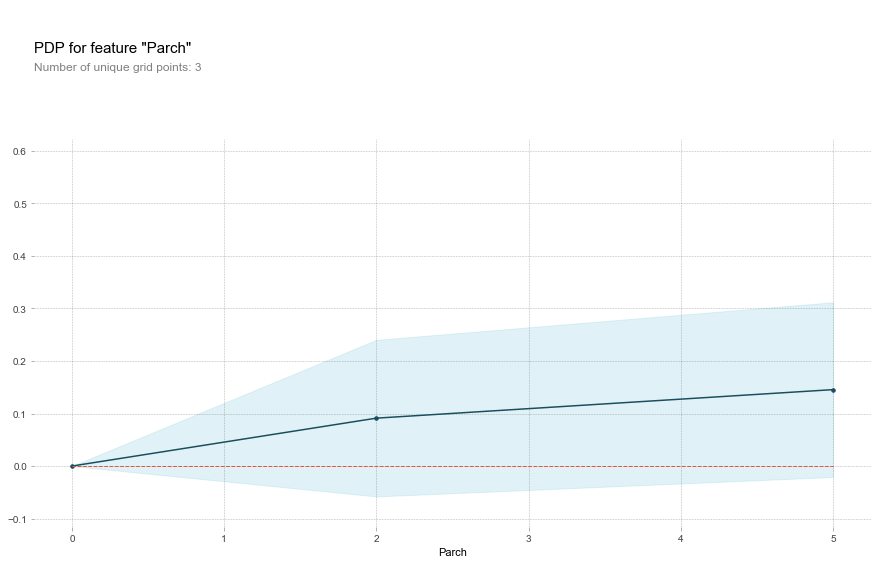

In [106]:
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

In [ ]:
# Add your code here
feats = ['Fare', 'Pclass']
inter1  =  pdp.pdp_interact(model=first_model, dataset=val_X, model_features=base_features, 
                            features=feats)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=feats,
                      plot_type='contour',plot_params={'cmap':'jet','inter_fill_alpha': 0.8})

plt.show()

In [111]:
# Make a small change to the code below to use in this problem. 
perm = PermutationImportance(first_model, random_state=1).fit(val_X, val_y)

# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1522 ± 0.0640,Pclass
0.1197 ± 0.0665,Fare
0.0977 ± 0.1129,Age
0.0167 ± 0.0328,SibSp
-0.0090 ± 0.0429,Parch


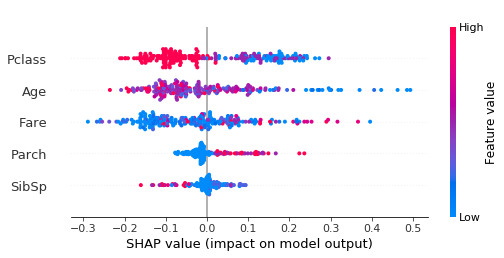

(223, 5) (223, 5)


In [112]:
explainer = shap.TreeExplainer(first_model)
shap_values = explainer.shap_values(val_X)
shap.summary_plot(shap_values, val_X)
print(shap_values.shape,val_X.shape)

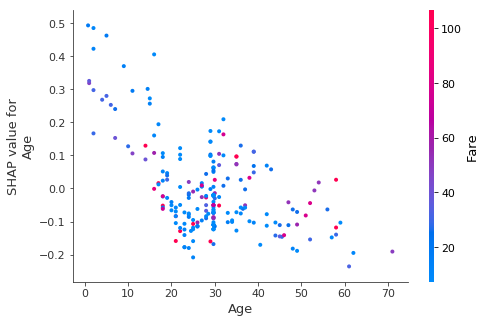

In [113]:
shap.dependence_plot('Age', shap_values, val_X,interaction_index='auto')

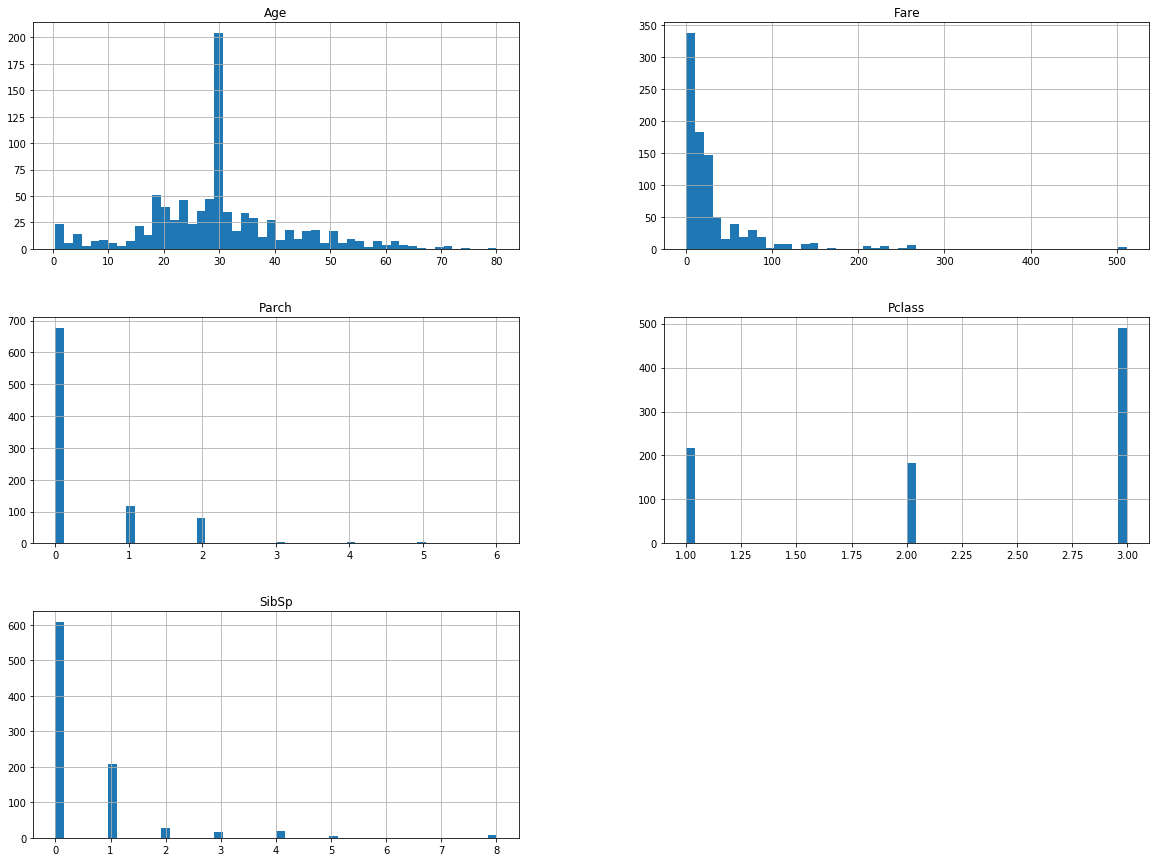

In [114]:
iX.hist(bins=50,figsize=(20,15))
plt.show()

In [115]:
corr_matrix = iX.corr()
corr_matrix['Age'].sort_values(ascending=False)

Age       1.000000
Fare      0.091566
Parch    -0.179191
SibSp    -0.232625
Pclass   -0.331339
Name: Age, dtype: float64

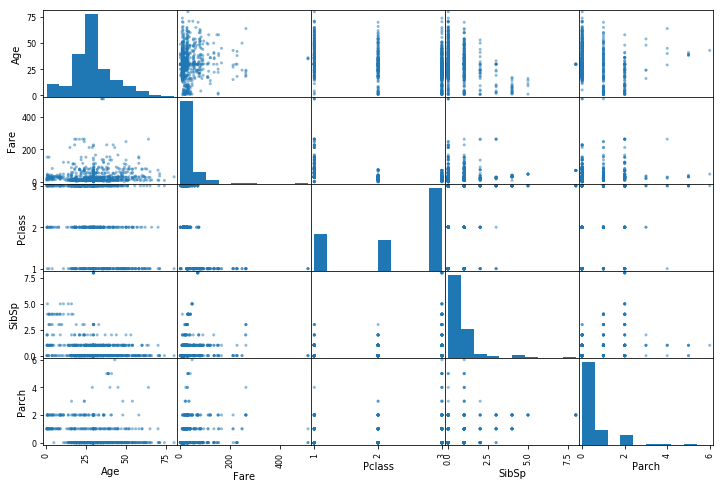

In [116]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(iX, figsize=(12,8));

Probably should add some columns for kids and women because lifeboats were given to them first.